In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## outlier_zcore

In [3]:
df = pd.read_csv('dataset/placement.csv')
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


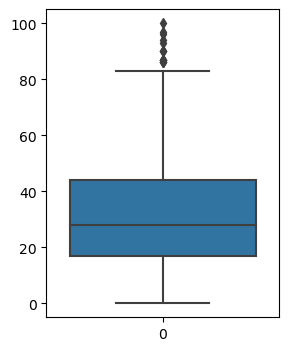

In [4]:
plt.figure(figsize=(3,4))
sns.boxplot(df['placement_exam_marks'])
plt.show()

C:\Users\bldea\AppData\Local\Temp\ipykernel_2536\947313667.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


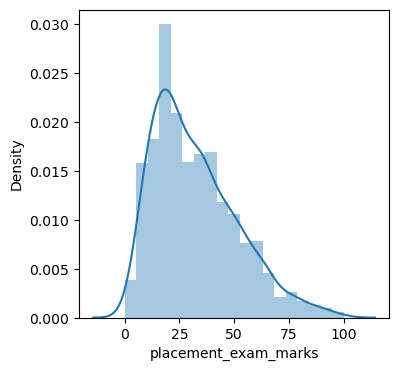

In [5]:
plt.figure(figsize=(4,4))
sns.distplot(df['placement_exam_marks'])
plt.show()

In [6]:
df['placement_exam_marks_zscore'] = (df['placement_exam_marks'] - df['placement_exam_marks'].mean())/df['placement_exam_marks'].std()

In [7]:
df[(df['placement_exam_marks_zscore'] > 3) | (df['placement_exam_marks_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,placement_exam_marks_zscore
9,7.75,94.0,1,3.229082
134,6.33,93.0,0,3.176811
162,7.80,90.0,0,3.019996
324,6.64,90.0,0,3.019996
630,6.56,96.0,1,3.333626
730,6.14,90.0,1,3.019996
846,6.99,97.0,0,3.385897
917,5.95,100.0,0,3.542712


In [10]:
new_df=df[(df['placement_exam_marks_zscore'] < 3) & (df['placement_exam_marks_zscore'] > -3)]

In [11]:
new_df

,cgpa,placement_exam_marks,placed,placement_exam_marks_zscore
0,7.19,26.0,1,-0.325391
1,7.46,38.0,1,0.301869
2,7.54,40.0,1,0.406412
3,6.42,8.0,1,-1.266281
4,7.23,17.0,0,-0.795836
...,...,...,...,...
995,8.87,44.0,1,0.615499
996,9.12,65.0,1,1.713204
997,4.89,34.0,0,0.092782
998,8.62,46.0,1,0.720042


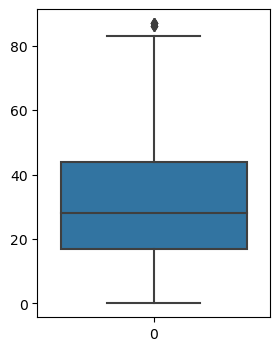

In [12]:
plt.figure(figsize=(3,4))
sns.boxplot(new_df['placement_exam_marks'])
plt.show()

## out_iqr

In [25]:
df = pd.read_csv('dataset/placement.csv')

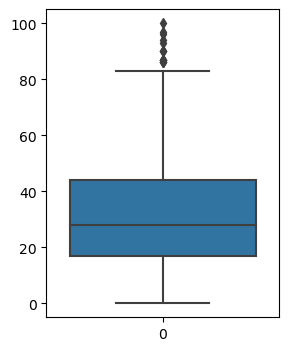

In [26]:
plt.figure(figsize=(3,4))
sns.boxplot(df['placement_exam_marks'])
plt.show()

C:\Users\bldea\AppData\Local\Temp\ipykernel_2536\947313667.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


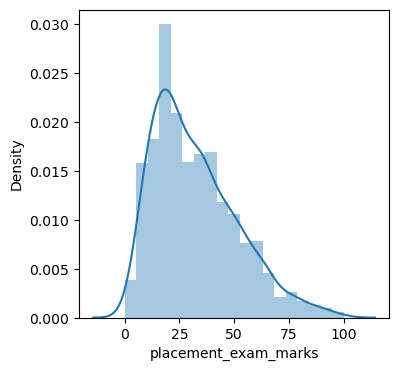

In [27]:
plt.figure(figsize=(4,4))
sns.distplot(df['placement_exam_marks'])
plt.show()

In [28]:
Q1 = df['placement_exam_marks'].quantile(0.25)
Q3 = df['placement_exam_marks'].quantile(0.75)
iqr = Q3 - Q1

In [29]:
upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr

In [30]:
#Finding
df[(df['placement_exam_marks'] > upper_limit) | (df['placement_exam_marks'] < lower_limit)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [31]:
# removing
new_df1 = df[(df['placement_exam_marks'] < upper_limit) & (df['placement_exam_marks'] > lower_limit)]
new_df1

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


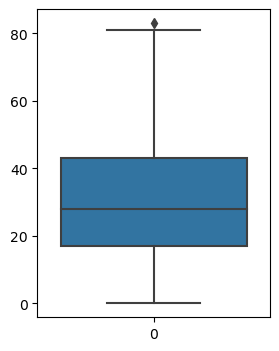

In [32]:
plt.figure(figsize=(3,4))
sns.boxplot(new_df1['placement_exam_marks'])
plt.show()

In [33]:
#replacing
df['placement_exam_marks'] = np.where(
    df['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        df['placement_exam_marks'] < lower_limit,
        lower_limit,
        df['placement_exam_marks']
    )
)
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


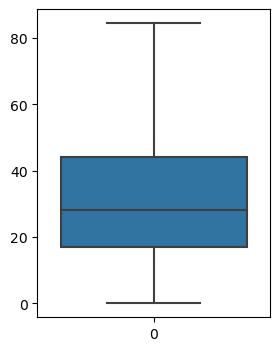

In [34]:
plt.figure(figsize=(3,4))
sns.boxplot(df['placement_exam_marks'])
plt.show()